In [101]:
import sys
import functools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
filename = "freq_train.csv"

df = pd.read_csv(filename)

In [103]:
df.head()

,class,pred,gt
0,__background__,98675,25355
1,goal,4,40
2,bathroom,11,33
3,macaroni,2,0
4,umpire,7,43


In [104]:
df.shape

(1122, 3)

# Functions

In [105]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100


def bar_plot(labels, values, label="Values", title="Chart"):
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()

    ax.bar(labels, values, width, label=label)

    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.legend()

def pie_plot(labels, values, title="Chart"):
    fig, ax = plt.subplots()

    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax.set_title(title)


def stacked_plot(labels, preds, gts, title="Chart"):
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, preds, width, label="# of predicted examples")
    ax.bar(labels, gts, width, bottom=preds, label="# of ground truth examples")

    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.legend()

In [106]:
def take(df, start, end):
    return df[start:end]

take10 = functools.partial(take, start=0, end=10)
take15 = functools.partial(take, start=0, end=15)
take20 = functools.partial(take, start=0, end=20)
takenext20 = functools.partial(take, start=10, end=20)

# Preprocessing

In [107]:
# mi dice quanto sbaglio rispetto alla ground truth
df["diff"] = (df["pred"] - df["gt"]).abs()

# mi dice in percentuale (attualmente tra 0-1) quanto sbaglio rispetto alla ground truth
# se è 0 = non c'è errore
# se è 1 = errore max
df["diff_percent"] = (df["pred"] - df["gt"]).abs() / (df["pred"] + df["gt"])

# mi dice quanto sbaglio rispetto alla ground truth tenendo conto del perché 
# (troppe prediction oppure troppo poche)
df["diff_rel"] = df["pred"] - df["gt"]

# numero totale di predizioni per una classe
df["total"] = df["pred"] + df["gt"]

In [108]:
df.head()

,class,pred,gt,diff,diff_percent,diff_rel,total
0,__background__,98675,25355,73320,0.591147,73320,124030
1,goal,4,40,36,0.818182,-36,44
2,bathroom,11,33,22,0.500000,-22,44
3,macaroni,2,0,2,1.000000,2,2
4,umpire,7,43,36,0.720000,-36,50


In [139]:
print("diff totali =", df.sort_values(by="diff", ascending=False)["diff"].sum())
print("diff top-10 =", df.sort_values(by="diff", ascending=False)["diff"][:10].sum())
print("diff __background__ =", df.sort_values(by="diff", ascending=False)["diff"][0].sum())

print("# pred =", df["pred"].sum())
print("# gt =", df["pred"].sum())
print("# classi azzeccate =", (df["pred"].sum() - df["diff"].sum()) / df["gt"].sum())

diff totali = 346870
diff top-10 = 212931
diff __background__ = 73320
# pred = 427226
# gt = 427226
# classi azzeccate = 0.18810365411175356


# Analysis

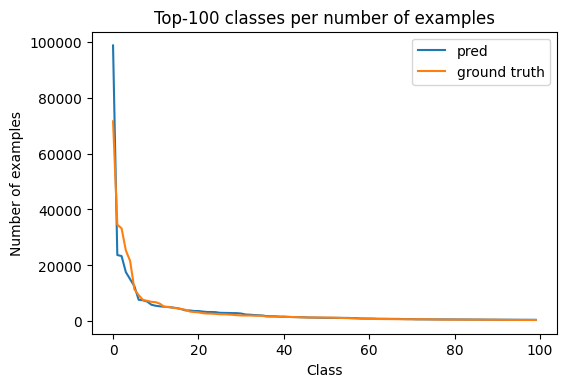

In [110]:
dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

labels = list(range(dfx["class"].shape[0]))
preds = dfx.sort_values(by="pred", ascending=False)["pred"]
gts = dfx.sort_values(by="gt", ascending=False)["gt"]
values = [preds, gts]

fig = plt.figure(figsize=(6, 4))
ax1 = fig.subplots(1, 1)

ax1.plot(labels[:100], preds[:100], label="pred")
ax1.plot(labels[:100], gts[:100], label="ground truth")
ax1.set_title("Top-100 classes per number of examples")
ax1.set_xlabel("Class")
ax1.set_ylabel("Number of examples")
ax1.legend()

plt.show()

# fig, ax = plt.subplots()
# ax.stackplot(labels, values, labels=["pred", "gt"])
# ax.set_yscale("log")
# ax2.legend()
# # ax.set_title('World population')
# # ax.set_xlabel('Year')
# # ax.set_ylabel('Number of people (millions)')

# plt.show()

## Top-10 most predicted classes on ground truth boxes

In [111]:
dfx = df.copy()
dfx.sort_values(by="pred", ascending=False).head(10)[["class", "pred"]]

,class,pred
0,__background__,98675
40,shirt,23715
39,man,23332
97,hair,17595
73,woman,15051
160,head,12567
306,hand,7714
437,people,7513
196,hat,7059
151,jacket,5915


## Top-10 most predicted classes on ground truth boxes

In [112]:
dfx = df.copy()
dfx.sort_values(by="gt", ascending=False).head(10)[["class", "gt"]]

,class,gt
39,man,71551
73,woman,34558
437,people,33257
0,__background__,25355
40,shirt,21589
189,boy,11455
95,dog,9377
114,girl,7654
153,water,7325
209,wall,6972


## Frequency of classes sorted by absolute gap between prediction and ground truth

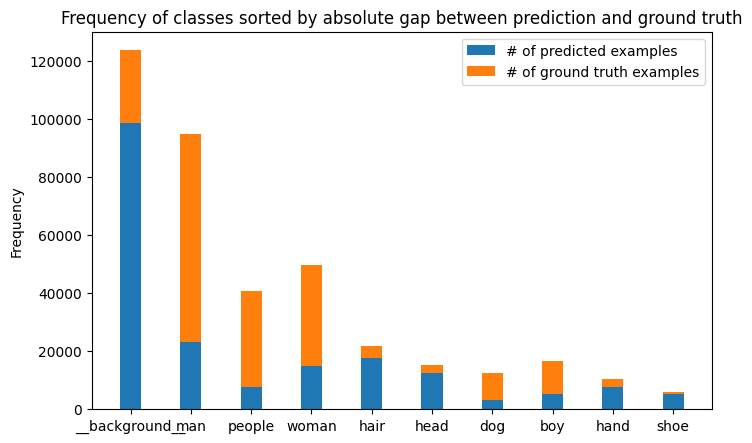

,class,pred,gt,diff,diff_rel,diff_percent
0,__background__,98675,25355,73320,73320,0.591147
39,man,23332,71551,48219,-48219,0.508194
437,people,7513,33257,25744,-25744,0.631445
73,woman,15051,34558,19507,-19507,0.393215
97,hair,17595,4092,13503,13503,0.622631
160,head,12567,2529,10038,10038,0.664944
95,dog,2983,9377,6394,-6394,0.517314
189,boy,5084,11455,6371,-6371,0.385211
306,hand,7714,2780,4934,4934,0.470173
204,shoe,5343,442,4901,4901,0.847191


In [113]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

labels = take10(dfx["class"])
preds = take10(dfx["pred"])
gts = take10(dfx["gt"])

stacked_plot(labels, preds, gts, title="Frequency of classes sorted by absolute gap between prediction and ground truth")
plt.show()

dfx.head(n=10)[["class", "pred", "gt", "diff", "diff_rel", "diff_percent"]]

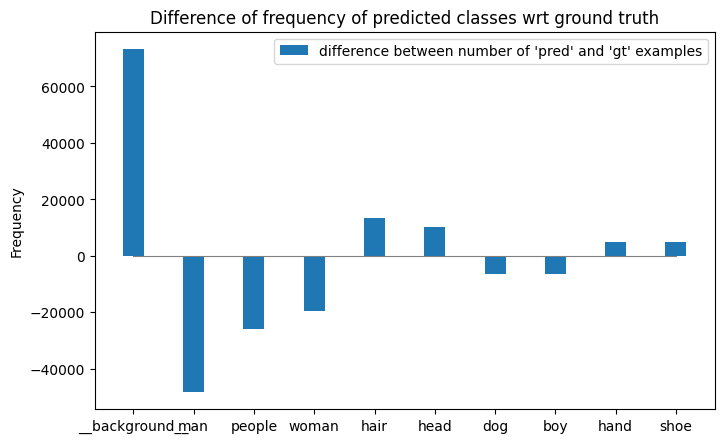

In [114]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

labels = take10(dfx["class"])
diff_rel = take10(dfx["diff_rel"])

bar_plot(labels, diff_rel, label="difference between number of 'pred' and 'gt' examples", title="Difference of frequency of predicted classes wrt ground truth")
plt.plot([0] * 10, "grey", linewidth=0.8)
plt.show()

## Frequency of classes sorted total number of prediction

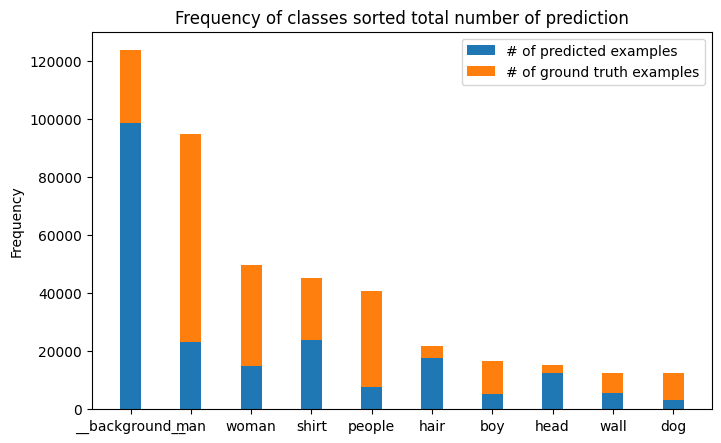

In [115]:
dfx = df.copy()
dfx = dfx.sort_values(by=["total"], ascending=False)

labels = take10(dfx["class"])
preds = take10(dfx["pred"])
gts = take10(dfx["gt"])

stacked_plot(labels, preds, gts, title="Frequency of classes sorted total number of prediction")
plt.show()

## Frequency of classes sorted by diff

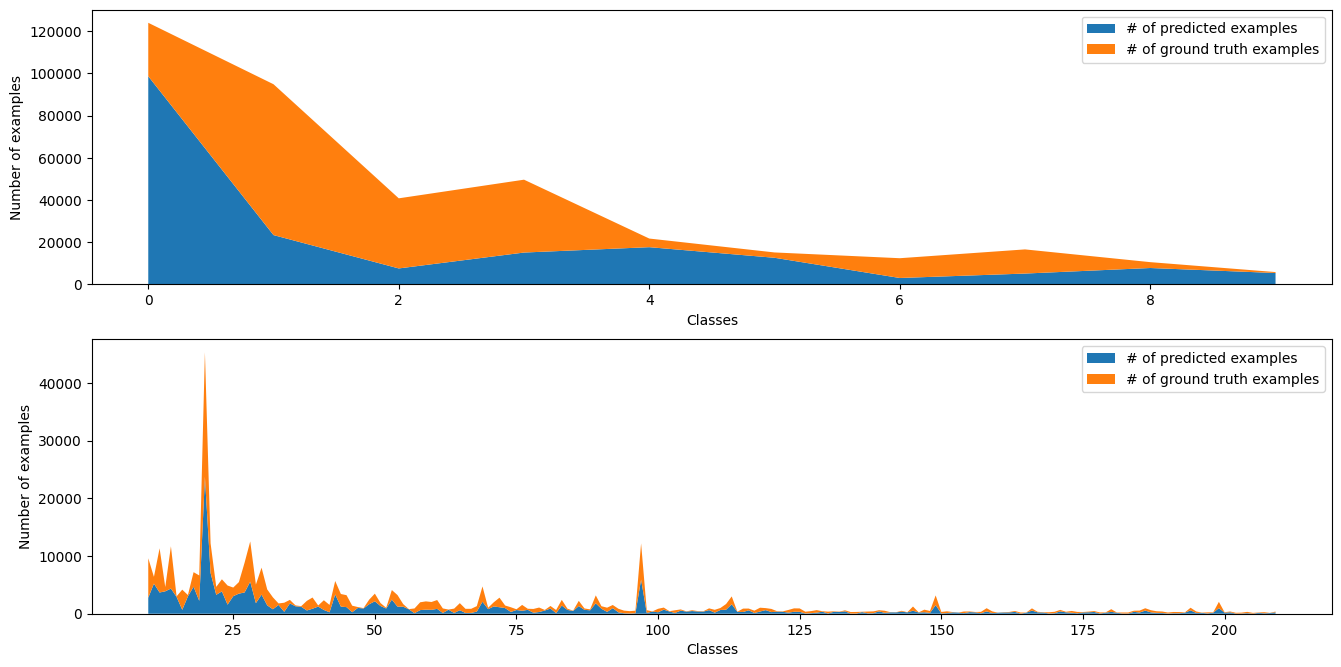

In [116]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

def get_labels(i, n): return np.array(list(range(n))) + i
def get_preds(i, n): return take(dfx["pred"], start=i, end=i + n)
def get_gts(i, n): return take(dfx["gt"], start=i, end=i + n)
def get_values(i, n): return np.array([get_preds(i, n), get_gts(i, n)])

fig = plt.figure(figsize=(16, 8))

ax1, ax2 = fig.subplots(2, 1)

i, n = 0, 10
ax1.stackplot(get_labels(i, n), get_values(i, n),
             labels=["# of predicted examples", "# of ground truth examples"],)

ax1.legend()
# ax1.set_title("Frequency of classes sorted total number of prediction")
ax1.set_xlabel("Classes")
ax1.set_ylabel("Number of examples")

i, n = 10, 200
ax2.stackplot(get_labels(i, n), get_values(i, n),
             labels=["# of predicted examples", "# of ground truth examples"],)

ax2.legend()
# ax2.set_title("Frequency of classes sorted total number of prediction")
ax2.set_xlabel("Classes")
ax2.set_ylabel("Number of examples")

# i, n = 110, 400
# ax3.stackplot(get_labels(i, n), get_values(i, n),
#              labels=["# of predicted examples", "# of ground truth examples"],)

# ax3.legend()
# # ax3.set_title("Frequency of classes sorted total number of prediction")
# ax3.set_xlabel("Classes")
# ax3.set_ylabel("Number of examples")

plt.show()

## Like the above but with bars

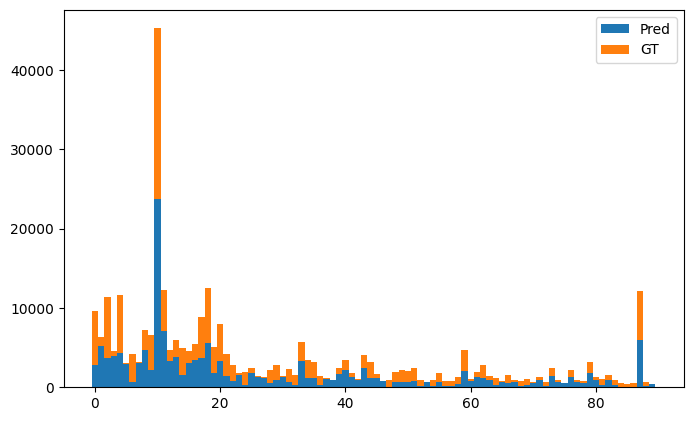

In [117]:
dfx = df.copy()

dfx = dfx.sort_values(by=["diff"], ascending=False)
dfx = take(dfx, start=10, end=100)

#labels = [""] * df["class"].shape[0]
labels = np.array(range(dfx["class"].shape[0]))
preds = dfx["pred"]
gts = dfx["gt"]

# vals = [preds, gts]

fig, ax = plt.subplots()
# ax.stackplot(labels, vals, labels=["Pred", "GT"])
ax.bar(labels, preds, label="Pred", width=1.0)
ax.bar(labels, gts, label="GT", width=1.0, bottom=preds)
ax.legend()

# stacked_plot(labels, preds, gts, title="Frequency of classes sorted total number of prediction")
plt.show()

## Difference between frequency of predicted and ground truth classes (i.e., absolute error)

## 

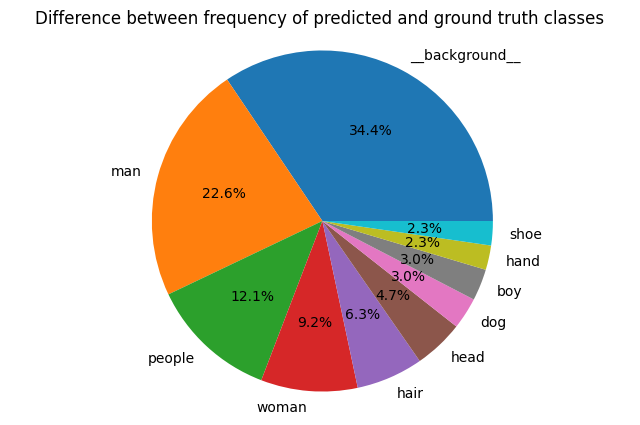

In [119]:
df = df.sort_values(by=["diff"], ascending=False)

labels = take10(df["class"])
diffs = take10(df["diff"])

pie_plot(labels, diffs, title="Difference between frequency of predicted and ground truth classes")
plt.show()

## Diff % wrt ground truth

In [120]:
dfx = df.copy()
dfx = dfx[(dfx["pred"] > 1000) & (dfx["gt"] > 1000)]

dfx.sort_values(by="diff_percent", ascending=False).head(n=10)

,class,pred,gt,diff,diff_percent,diff_rel,total
160,head,12567,2529,10038,0.664944,10038,15096
368,window,5219,1172,4047,0.633234,4047,6391
437,people,7513,33257,25744,0.631445,-25744,40770
97,hair,17595,4092,13503,0.622631,13503,21687
0,__background__,98675,25355,73320,0.591147,73320,124030
95,dog,2983,9377,6394,0.517314,-6394,12360
39,man,23332,71551,48219,0.508194,-48219,94883
306,hand,7714,2780,4934,0.470173,4934,10494
377,ground,2774,6836,4062,0.422685,-4062,9610
239,tree,3276,1374,1902,0.409032,1902,4650


## Esotheric classes

In [121]:
#(df["gt"] < 10) | 
df[(df["pred"] > 50) & (df["gt"] < 10)].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
442,speaker,93,7,86,0.860000,86,100
362,outlet,58,0,58,1.000000,58,58
1020,brick,58,2,56,0.933333,56,60
505,vent,61,6,55,0.820896,55,67
551,knob,53,1,52,0.962963,52,54
732,grate,52,8,44,0.733333,44,60


In [122]:
df[((df["gt"] >= 10) & (df["gt"] < 100)) | ((df["pred"] >= 10) & (df["pred"] < 100))].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
225,ear,2915,95,2820,0.936877,2820,3010
273,watch,913,61,852,0.874743,852,974
379,eye,772,25,747,0.937265,747,797
274,dogs,91,821,730,0.800439,-730,912
466,sock,691,32,659,0.911480,659,723
231,tail,482,43,439,0.836190,439,525
67,elephant,82,453,371,0.693458,-371,535
626,players,42,405,363,0.812081,-363,447
156,horses,86,443,357,0.674858,-357,529
615,cloud,374,27,347,0.865337,347,401


In [123]:
df[((df["gt"] >= 100) & (df["gt"] < 1000)) | ((df["pred"] >= 100) & (df["pred"] < 1000))].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
204,shoe,5343,442,4901,0.847191,4901,5785
267,face,3883,740,3143,0.679862,3143,4623
540,men,680,3491,2811,0.673939,-2811,4171
240,wheel,3006,232,2774,0.856702,2774,3238
83,field,769,2071,1302,0.458451,-1302,2840
541,shadow,1520,260,1260,0.707865,1260,1780
591,women,331,1576,1245,0.652858,-1245,1907
479,pole,1784,615,1169,0.487286,1169,2399
318,nose,1287,153,1134,0.787500,1134,1440
144,tire,1209,104,1105,0.841584,1105,1313


In [124]:
df[(df["gt"] >= 1000) | (df["pred"] >= 1000)].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
0,__background__,98675,25355,73320,0.591147,73320,124030
39,man,23332,71551,48219,0.508194,-48219,94883
437,people,7513,33257,25744,0.631445,-25744,40770
73,woman,15051,34558,19507,0.393215,-19507,49609
97,hair,17595,4092,13503,0.622631,13503,21687
160,head,12567,2529,10038,0.664944,10038,15096
95,dog,2983,9377,6394,0.517314,-6394,12360
189,boy,5084,11455,6371,0.385211,-6371,16539
306,hand,7714,2780,4934,0.470173,4934,10494
204,shoe,5343,442,4901,0.847191,4901,5785


## Pred vs GT

We have 6 outliers in x and 6 outliers in y
Disregarded 6 outliers


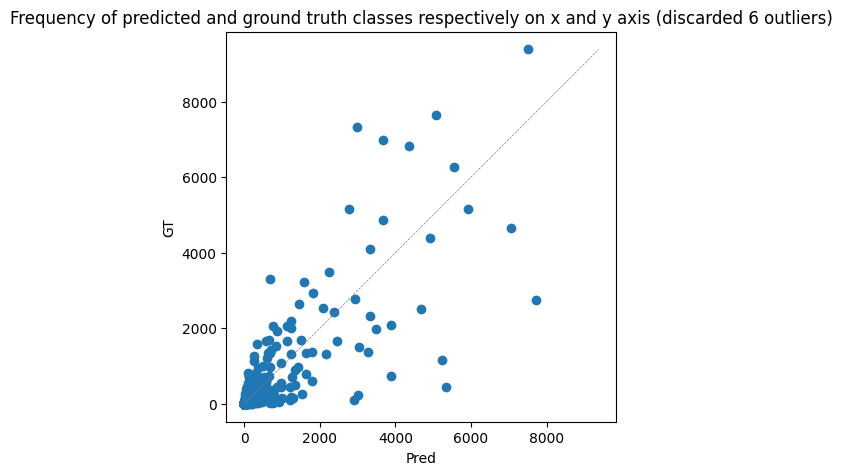

In [125]:
def scatter_plot(x, y):
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65

    rect_scatter = [left, bottom, width, height]

    # start with a square Figure
    fig = plt.figure(figsize=(6, 6))

    # scatter plot
    ax = fig.add_axes(rect_scatter)
    ax.scatter(x, y)

    # labels
    ax.set_xlabel("Pred")
    ax.set_ylabel("GT")


def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

m = 3.3

x = dfx["pred"].to_numpy()
y = dfx["gt"].to_numpy()

s1 = x.shape[0]

x = reject_outliers(x, m=m)
y = reject_outliers(y, m=m)

sx = x.shape[0]
sy = y.shape[0]
s2 = min(sx, sy)

# clip to same size
x = x[:s2]
y = y[:s2]
good = list(range(max(np.max(np.abs(x)), np.max(np.abs(y)))))

n_outliers = s1 - s2

print(f"We have {s1 - sx} outliers in x and {s1 - sy} outliers in y")
print(f"Disregarded {n_outliers} outliers")


scatter_plot(x, y)
plt.plot(good, good, color="gray", linewidth=0.5, linestyle="--")
plt.title(f"Frequency of predicted and ground truth classes respectively on x and y axis (discarded {n_outliers} outliers)")
plt.show()

We have 58 outliers in x and 60 outliers in y
Disregarded 60 outliers


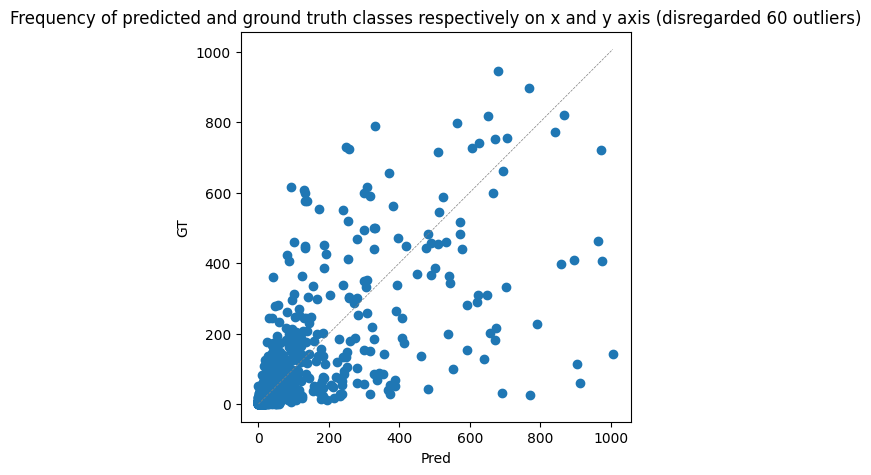

In [126]:
dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

m = 0.2

x = dfx["pred"].to_numpy()
y = dfx["gt"].to_numpy()

s1 = x.shape[0]  # size of arrays before outliers are removed

x = reject_outliers(x, m=m)
y = reject_outliers(y, m=m)

sx = x.shape[0]
sy = y.shape[0]
s2 = min(sx, sy)

# clip to same size
x = x[:s2]
y = y[:s2]
good = list(range(max(np.max(np.abs(x)), np.max(np.abs(y)))))

n_outliers = s1 - s2

print(f"We have {s1 - sx} outliers in x and {s1 - sy} outliers in y")
print(f"Disregarded {n_outliers} outliers")

scatter_plot(x, y)
plt.plot(good, good, color="gray", linewidth=0.5, linestyle="--")
plt.title(f"Frequency of predicted and ground truth classes respectively on x and y axis (disregarded {n_outliers} outliers)")
plt.show()